# Test LP Filter

Setup

In [2]:
import numpy as np
try:
    from SecondOrderElec import LP
except ImportError:
    import sys
    sys.path.append('../.')
    from SecondOrderElec import LP

Let's create some filters

In [4]:
T1 = LP(2,0.1,100)
T2 = LP(2,1.5,100)

Let's create a logspace for later

In [6]:
w = np.logspace(1,3,1000)

## Poles / Zeros

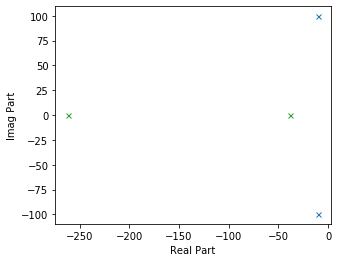

In [8]:
for T in [T1,T2]:
    T.pzmap()

### Time Response

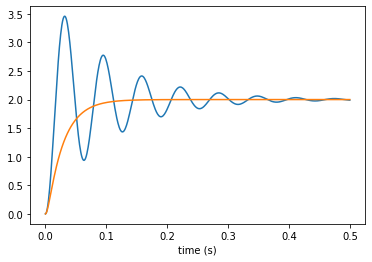

In [10]:
t = np.arange(0,0.5,0.001)
for T in [T1,T2]:
    T.step(T=t)

In [12]:
for index, T in enumerate([T1,T2]):
    print("system {}".format(index))
    print("wp = {} rad/s".format(T.wp))
    print("Tp = {} rad/s".format(T.Tp))
    print("R = {}".format(T.R))

system 0
wp = 99.498743710662 rad/s
Tp = 0.06314838833996553 rad/s
R = 1.8803988026214895
system 1
wp = None rad/s
Tp = None rad/s
R = 0


### Frequency Response

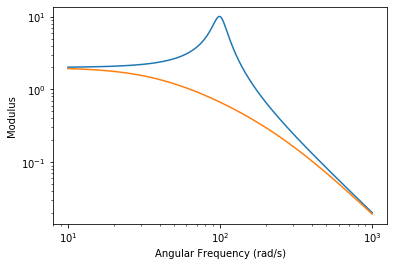

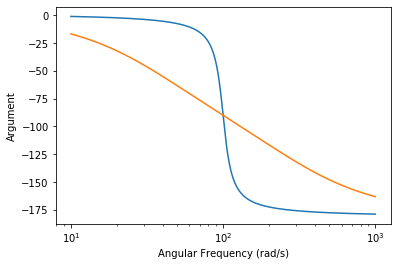

In [14]:
for T in [T1,T2]:
    T.freqresp(w=w)

In [16]:
T1.den

array([1.e-04, 2.e-03, 1.e+00])

(array([  1.        ,   1.00099001,   1.00198002, ...,  99.99801998,
         99.99900999, 100.        ]),
 array([ 0.        ,  0.04697546,  0.19070465, ..., -5.28416273,
        -5.27790221, -5.266242  ]),
 array([[ 0.00000000e+00,  0.00000000e+00],
        [ 4.89282349e-03,  2.34877300e-06],
        [ 9.32542222e-03,  9.53523268e-06],
        ...,
        [ 5.11552660e-04, -2.64208137e-04],
        [ 4.02916872e-04, -2.63895111e-04],
        [ 5.94206598e-04, -2.63312100e-04]]))

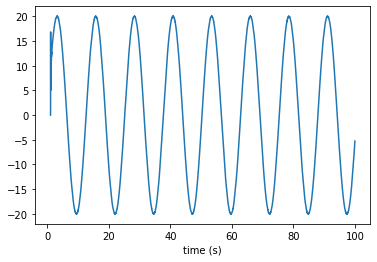

In [21]:
x = np.linspace(1, 100, 100000)
y = np.sin(x*0.5)*10+np.sin(x*10**4)
T1.output(U=y, T=x)
